# 处理wine数据集，第一组数据

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame,Series
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

下面读入相应的数据，这里路径是绝对路径

In [2]:
filename='C:/Users/lyxto/code/wine-reviews/winemag-data_first150k.csv'
df=pd.read_csv(filename)

下面输入输出数据的形状结构

In [3]:
cols = df.columns
print(df.shape)
print(cols)

(150930, 11)
Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')


## 之后几段是标称属性的频数统计
下面统计每个province的频数

In [4]:
cname='province'
pd.set_option('display.max_columns', None)#显示所有行
pd.set_option('display.max_rows', None)#显示所有列
a=df.groupby(by=cname).size()
print(a)

province
Achaia                                        2
Aconcagua Costa                               5
Aconcagua Valley                            194
Aegean                                       16
Ahr                                           5
Aigialias Slopes                              2
Alenquer                                      7
Alentejano                                  872
Alentejo                                    148
Alenteo                                       2
Algarve                                      11
Alsace                                     1680
America                                      27
Amindeo                                       4
Amyndeon                                      8
Andalucia                                   200
Ankara                                        5
Apalta                                       13
Arcadia                                       5
Arizona                                      39
Atalanti Valley                

下面统计每个country的频数

In [5]:
cname='country'
pd.set_option('display.max_columns', None)#显示所有行
pd.set_option('display.max_rows', None)#显示所有列
a=df.groupby(by=cname).size()
print(a)

country
Albania                       2
Argentina                  5631
Australia                  4957
Austria                    3057
Bosnia and Herzegovina        4
Brazil                       25
Bulgaria                     77
Canada                      196
Chile                      5816
China                         3
Croatia                      89
Cyprus                       31
Czech Republic                6
Egypt                         3
England                       9
France                    21098
Georgia                      43
Germany                    2452
Greece                      884
Hungary                     231
India                         8
Israel                      630
Italy                     23478
Japan                         2
Lebanon                      37
Lithuania                     8
Luxembourg                    9
Macedonia                    16
Mexico                       63
Moldova                      71
Montenegro                    2


下面统计region_1里每项的频数

In [6]:
cname='region_1'
pd.set_option('display.max_columns', None)#显示所有行
pd.set_option('display.max_rows', None)#显示所有列
a=df.groupby(by=cname).size()
print(a)

region_1
Abruzzo                                                 14
Adelaida District                                       25
Adelaide                                                54
Adelaide Hills                                         139
Adelaide Plains                                          4
Aglianico del Beneventano                                4
Aglianico del Taburno                                   12
Aglianico del Vulture                                   86
Agrelo                                                  48
Albana di Romagna                                       15
Albemarle County                                         2
Alcamo                                                  14
Aleatico dell'Elba                                       1
Alella                                                   9
Alexander Valley                                      1139
Alghero                                                 13
Alicante                                       

下面是region_2里每项的频数

In [7]:
cname='region_2'
pd.set_option('display.max_columns', None)#显示所有行
pd.set_option('display.max_rows', None)#显示所有列
a=df.groupby(by=cname).size()
print(a)

region_2
California Other            3516
Central Coast              13057
Central Valley              1115
Columbia Valley             9157
Finger Lakes                1510
Long Island                  771
Mendocino/Lake Counties     2389
Napa                        8801
Napa-Sonoma                 1645
New York Other               147
North Coast                  632
Oregon Other                 661
Sierra Foothills            1660
Sonoma                     11258
South Coast                  198
Southern Oregon              662
Washington Other             593
Willamette Valley           3181
dtype: int64


下面是variety里每项的频数

In [8]:
cname='variety'
pd.set_option('display.max_columns', None)#显示所有行
pd.set_option('display.max_rows', None)#显示所有列
a=df.groupby(by=cname).size()
print(a)

variety
Agiorgitiko                              120
Aglianico                                317
Aidani                                     1
Airen                                      6
Albana                                    17
Albariño                                 537
Albarossa                                  1
Albarín                                    1
Aleatico                                  11
Alfrocheiro                               18
Alicante                                  10
Alicante Bouschet                         42
Aligoté                                   30
Alsace white blend                        52
Altesse                                    1
Alvarelhão                                 2
Alvarinho                                 77
Alvarinho-Chardonnay                       3
Angevine                                   5
Ansonica                                   4
Antão Vaz                                 16
Apple                                      6
Ar

下面是winery里每项的频数

In [9]:
cname='winery'
pd.set_option('display.max_columns', None)#显示所有行
pd.set_option('display.max_rows', None)#显示所有列
a=df.groupby(by=cname).size()
print(a)

winery
'37 Cellars                                                 2
1+1=3                                                      10
10 Knots                                                   16
1000 Stories                                                1
1040FU                                                      1
1070 Green                                                  1
10Span                                                      2
12 Linajes                                                  7
12C Wines                                                   1
14 Hands                                                   18
16X20                                                       2
1789 Wines                                                  1
181                                                         3
1848 Winery                                                 8
1850                                                        1
1919                                                        3
2

## 下面几段的部分是统计数值属性的相关信息以及可视化
下面是points的相关信息，没有缺失值

count    150930.000000
mean         87.888418
std           3.222392
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64
缺失值个数： 0


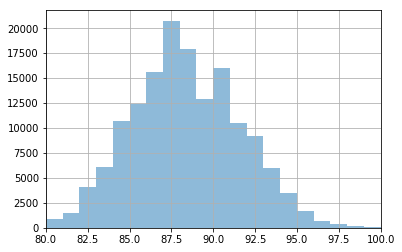

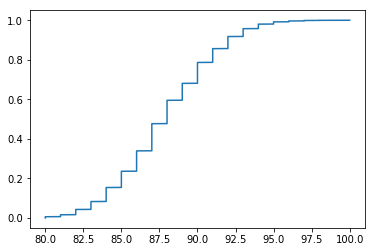

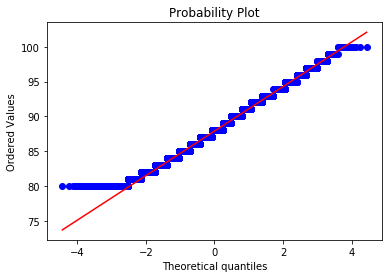

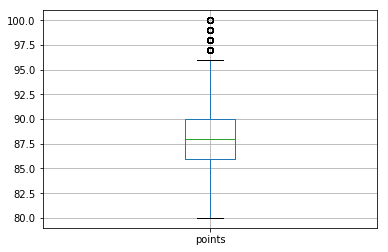

In [10]:
cname='points'
print(df[cname].describe())
loss=len(df)-df[cname].count()
print("缺失值个数：",loss)
#直方图绘制
plt.xlim(80,100)
df[cname].hist(alpha=0.5,bins=20)
plt.show()
#累计分布图绘制
x=np.sort(df[cname])
y=np.arange(len(x))/float(len(x))
plt.plot(x,y)
plt.show()
#QQ图绘制
#x_label = stats.norm.ppf(y)
#plt.scatter(x_label, x)
#plt.show()
stats.probplot(df[cname], dist="norm", plot=plt)
plt.show()
#盒图绘制
a=DataFrame(df,columns=[cname])
a.boxplot()
plt.show()


下面是price的相关信息
将缺失部分剔除

count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64
缺失值个数： 13695


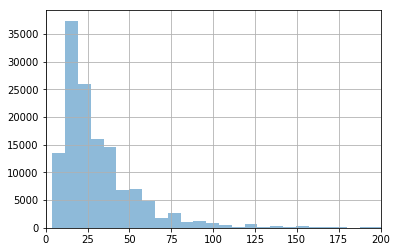

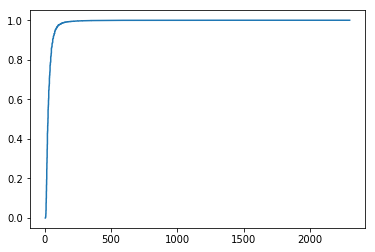

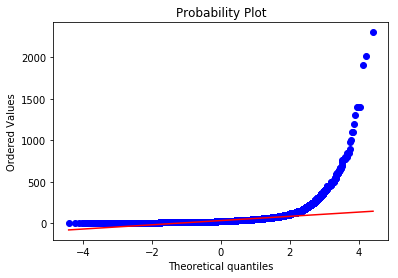

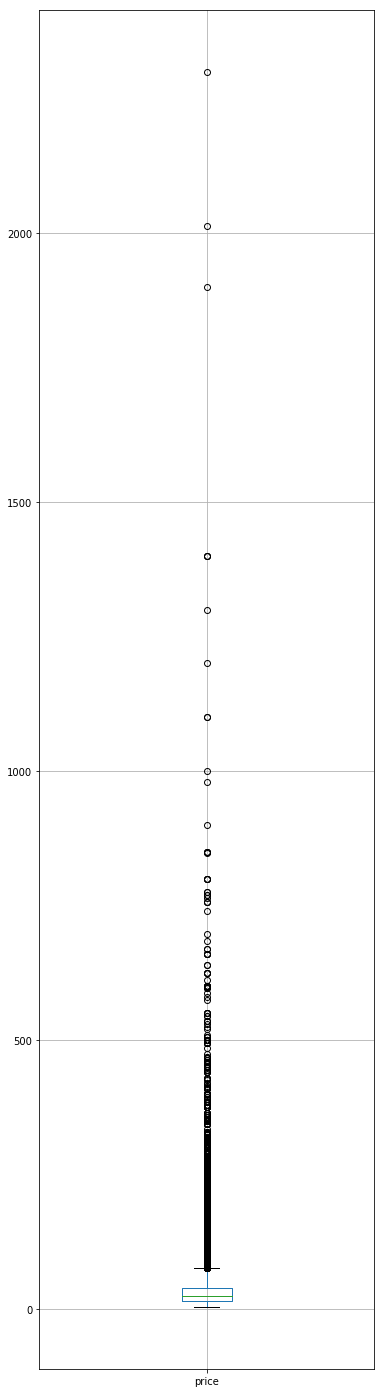

In [11]:
cname='price'
a=DataFrame(df,columns=[cname])
a=a.dropna()#去除缺失值
print(a[cname].describe())
loss=len(df)-a[cname].count()
print("缺失值个数：",loss)
#直方图绘制
plt.xlim(0,200)
a[cname].hist(alpha=0.5,bins=300)
plt.show()
#累计分布图绘制
x1=np.sort(a[cname])
y1=np.arange(len(x1))/float(len(x1))
plt.plot(x1,y1)
plt.show()
#QQ图绘制
#x_label = stats.norm.ppf(y)
#plt.scatter(x_label, x)
#plt.show()
stats.probplot(a[cname], dist="norm", plot=plt)
plt.show()
#盒图绘制
a.boxplot(figsize=(6,25))
plt.show()

用最高频率值来填补缺失值

众数:
    price
0   20.0
count    150930.000000
mean         31.939966
std          34.840211
min           4.000000
25%          16.000000
50%          22.000000
75%          38.000000
max        2300.000000
Name: price, dtype: float64


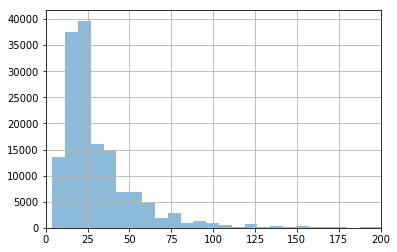

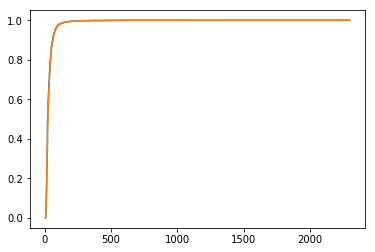

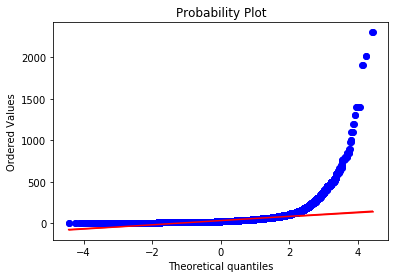

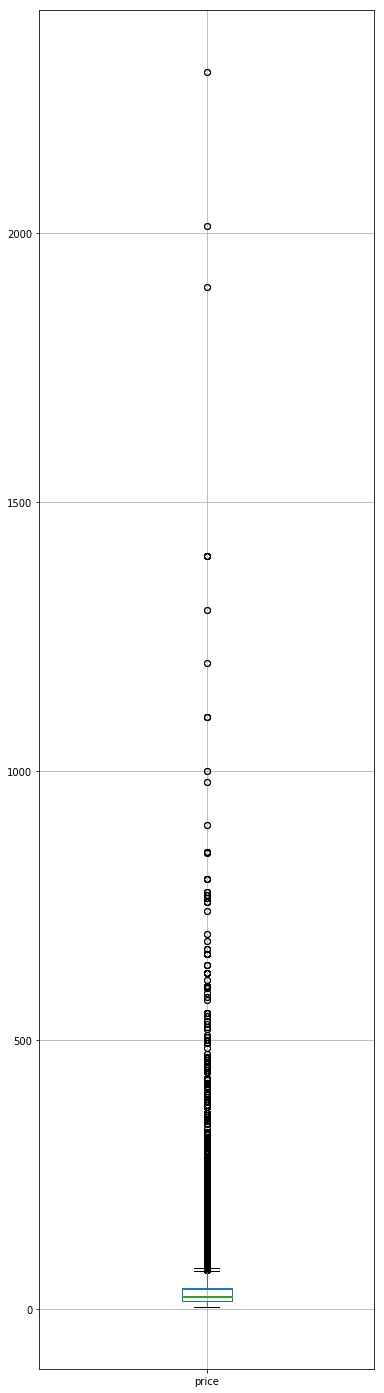

In [12]:
#求众数

mode=a.mode()
print("众数:\n",mode)
#用众数替换缺失值
b=DataFrame(df,columns=[cname])
b=b.fillna(20)
#替换后的数据分析
print(b[cname].describe())
#直方图
plt.xlim(0,200)
b[cname].hist(alpha=0.5,bins=300)
plt.show()
#累计分布图
x2=np.sort(b[cname])
y2=np.arange(len(x2))/float(len(x2))
plt.plot(x2,y2)
plt.plot(x1,y1)
plt.show()
#QQ图
stats.probplot(b[cname], dist="norm", plot=plt)
stats.probplot(a[cname], dist="norm", plot=plt)

plt.show()
#盒图
b.boxplot(figsize=(6,25))
a.boxplot(figsize=(6,25))
plt.show()


通过属性的相关关系来填补缺失值

In [13]:
print(df.corr())
linreg = LinearRegression()
liby=df.dropna(subset=[cname])
y=liby[[cname]]
zty=df[['country','price','points']]
print(zty.shape)
liby = pd.get_dummies(zty)
liby= liby.astype('float')

            Unnamed: 0    points     price
Unnamed: 0    1.000000 -0.094197 -0.036687
points       -0.094197  1.000000  0.459863
price        -0.036687  0.459863  1.000000
(150930, 3)


In [14]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)

In [15]:
known_price = liby[liby.price.notnull()].as_matrix()
unknown_price = liby[liby.price.isnull()].as_matrix()


y = known_price[:, 0:1]
X = known_price[:, 1:50]
print(X.shape)
#z=unknown_price[:,0:49]
rfr.fit(X, y)
predictedprice = rfr.predict(unknown_price[:, 1:50])
ans=df
ans.loc[(ans.price.isnull()),'price'] = predictedprice

C:\Users\lyxto\app\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\lyxto\app\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\lyxto\app\anaconda\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


(137235, 49)


(150930, 1)
count    150930.000000
mean         34.171270
std          37.284532
min           4.000000
25%          16.000000
50%          25.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64


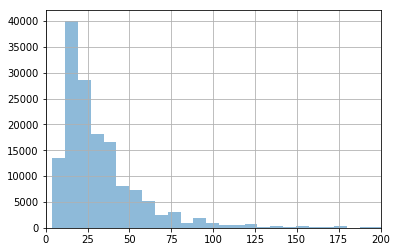

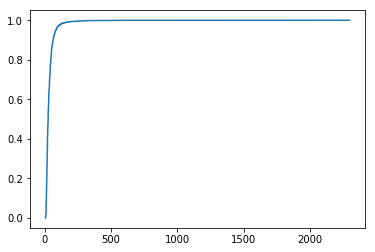

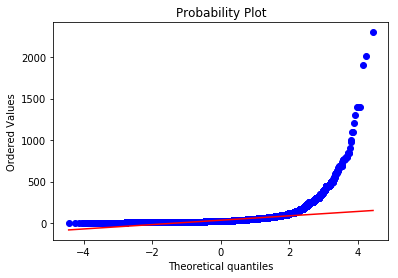

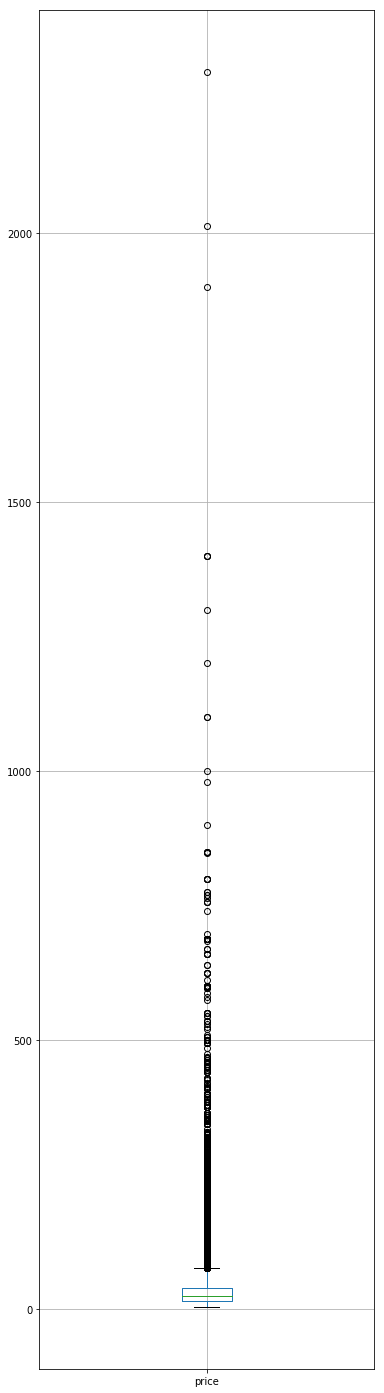

In [16]:
cname='price'
c=DataFrame(ans,columns=[cname])
print(c.shape)
print(c[cname].describe())
#直方图
plt.xlim(0,200)
c[cname].hist(alpha=0.5,bins=300)
plt.show()
#累计分布图
x3=np.sort(c[cname])
y3=np.arange(len(x2))/float(len(x2))
plt.plot(x3,y3)
plt.show()
#QQ图
stats.probplot(c[cname], dist="norm", plot=plt)
plt.show()
#盒图
c.boxplot(figsize=(6,25))
plt.show()

通过数据对象之间的相似性来填补缺失值

In [17]:
ans=zty.sort_values(["points","country"],inplace=False,ascending=True)
ansk=ans
while len(ans)!=len(ans.dropna()):
    ans=ans.fillna(method="bfill")
ans1= ans['price'].as_matrix()
while len(ansk)!=len(ansk.dropna()):
    ansk=ansk.fillna(method='ffill')
ans2= ansk['price'].as_matrix()
ans3=(ans2+ans1)/2

C:\Users\lyxto\app\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\lyxto\app\anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


C:\Users\lyxto\app\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


count    150930.000000
mean         34.076840
std          37.451181
min           4.000000
25%          16.000000
50%          25.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64


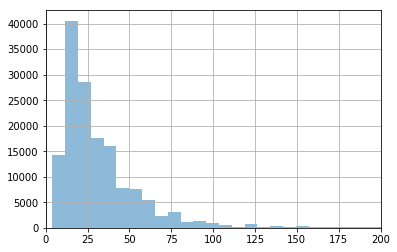

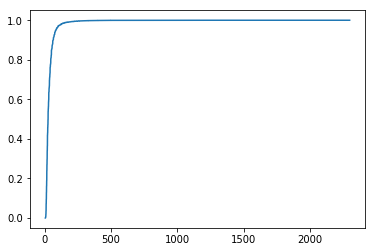

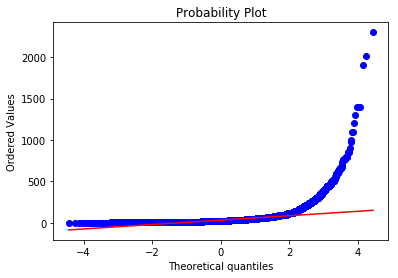

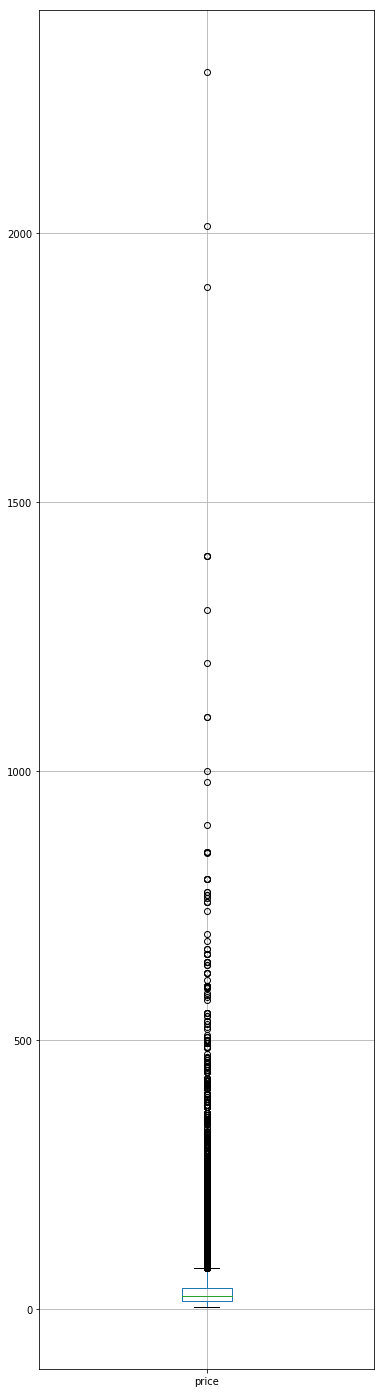

In [18]:
cname='price'
ansd=zty
ansd[cname]=pd.DataFrame(ans3)
d=DataFrame(ansd,columns=[cname])
print(d[cname].describe())
#直方图
plt.xlim(0,200)
d[cname].hist(alpha=0.5,bins=300)
plt.show()
#累计分布图
x3=np.sort(d[cname])
y3=np.arange(len(x2))/float(len(x2))
plt.plot(x3,y3)
plt.show()
#QQ图
stats.probplot(d[cname], dist="norm", plot=plt)
plt.show()
#盒图
d.boxplot(figsize=(6,25))
plt.show()

四种方法的可视化比较

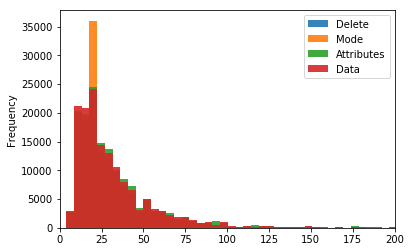

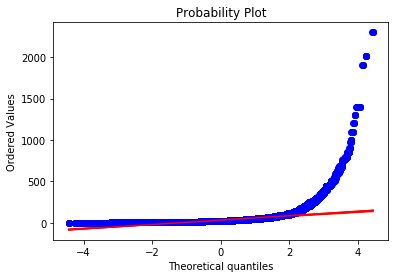

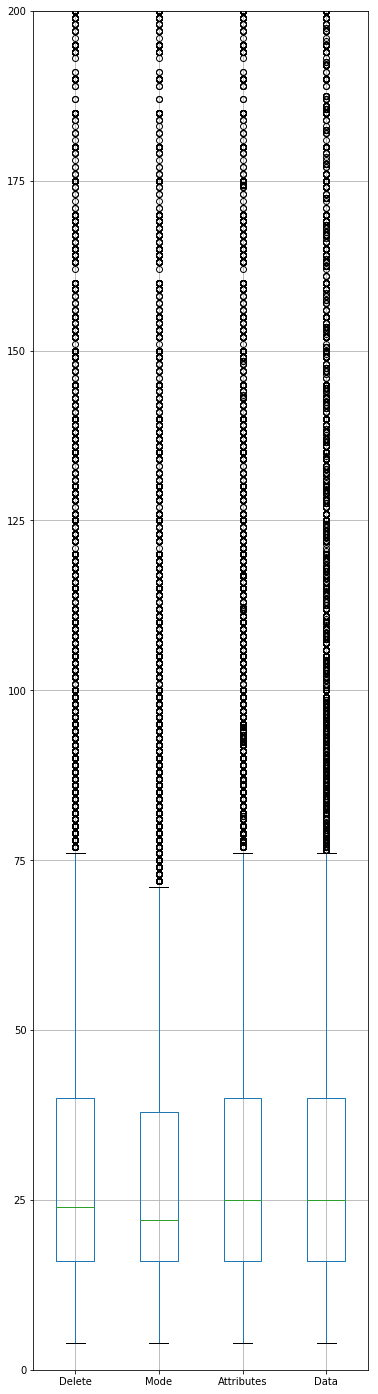

In [19]:
res = pd.concat([a,b,c,d],axis=1,ignore_index=True)
res.columns = ['Delete', 'Mode', 'Attributes', 'Data']
#直方图
res.plot.hist(alpha=0.9,bins=500)
plt.xlim(0,200)
plt.show()


#QQ图
stats.probplot(a[cname], dist="norm", plot=plt)
stats.probplot(b[cname], dist="norm", plot=plt)
stats.probplot(c[cname], dist="norm", plot=plt)
stats.probplot(d[cname], dist="norm", plot=plt)
plt.show()
#盒图
res.boxplot(figsize=(6,25))
plt.ylim(0,200)
plt.show()